In [1]:
# Importar librerías necesarias
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

In [2]:
# --- Configuración de Rutas ---
# Agregamos el directorio raíz del proyecto al path de Python
project_root = os.path.abspath(os.path.join('..'))
if project_root not in sys.path:
    sys.path.append(project_root)

# Importar nuestros módulos personalizados
from src import feature_detection

# Configuración de visualización para Matplotlib
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['image.cmap'] = 'gray'

print("✅ Entorno configurado correctamente.")
print(f"📂 Directorio raíz del proyecto: {project_root}")

✅ Entorno configurado correctamente.
📂 Directorio raíz del proyecto: d:\Inteligencia Artificial\Semestre II\Vision por computador\Practica_2\proyecto_registro_imagenes


In [3]:
# Definir directorio de datos
data_dir = os.path.join(project_root, 'data', 'original')

# Listar archivos de imagen válidos
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
files = [f for f in os.listdir(data_dir) if f.lower().endswith(valid_extensions)]

datos_imagenes = []
imagenes_cargadas = {} # Diccionario para guardar las imágenes en memoria

print(f"🔎 Analizando {len(files)} imágenes en: {data_dir}\n")

for archivo in files:
    ruta_completa = os.path.join(data_dir, archivo)
    
    # Cargar imagen
    img = cv2.imread(ruta_completa)
    
    if img is not None:
        imagenes_cargadas[archivo] = img
        
        # Obtener propiedades
        alto, ancho, canales = img.shape
        peso_mb = os.path.getsize(ruta_completa) / (1024 * 1024)
        megapixeles = (alto * ancho) / 1_000_000
        
        datos_imagenes.append({
            "Nombre": archivo,
            "Dimensiones (WxH)": f"{ancho}x{alto}",
            "Canales": canales,
            "Megapíxeles": round(megapixeles, 2),
            "Peso (MB)": round(peso_mb, 2),
            "Relación Aspecto": round(ancho / alto, 2),
            "Dtype": img.dtype
        })
    else:
        print(f"⚠️ Error al leer: {archivo}")

# Crear DataFrame y mostrar tabla
df_info = pd.DataFrame(datos_imagenes)
display(df_info)

# --- Advertencia de tamaño ---
# Si las imágenes son mayores a 12MP o muy grandes, sugerimos redimensionar
max_dim = max(df_info['Dimensiones (WxH)'].apply(lambda x: int(x.split('x')[0])).max(), 
              df_info['Dimensiones (WxH)'].apply(lambda x: int(x.split('x')[1])).max())

if max_dim > 2500:
    print(f"\n⚠️ NOTA: Tus imágenes son bastante grandes ({max_dim}px).")
    print("   El algoritmo SIFT puede ser lento. Considera usar un resize si tarda mucho.")
else:
    print("\n✅ El tamaño de las imágenes es adecuado para procesamiento rápido.")

🔎 Analizando 3 imágenes en: d:\Inteligencia Artificial\Semestre II\Vision por computador\Practica_2\proyecto_registro_imagenes\data\original



,Nombre,Dimensiones (WxH),Canales,Megapíxeles,Peso (MB),Relación Aspecto,Dtype
0,IMG01.jpg,684x912,3,0.62,0.12,0.75,uint8
1,IMG02.jpg,684x912,3,0.62,0.13,0.75,uint8
2,IMG03.jpg,1216x912,3,1.11,0.22,1.33,uint8



✅ El tamaño de las imágenes es adecuado para procesamiento rápido.


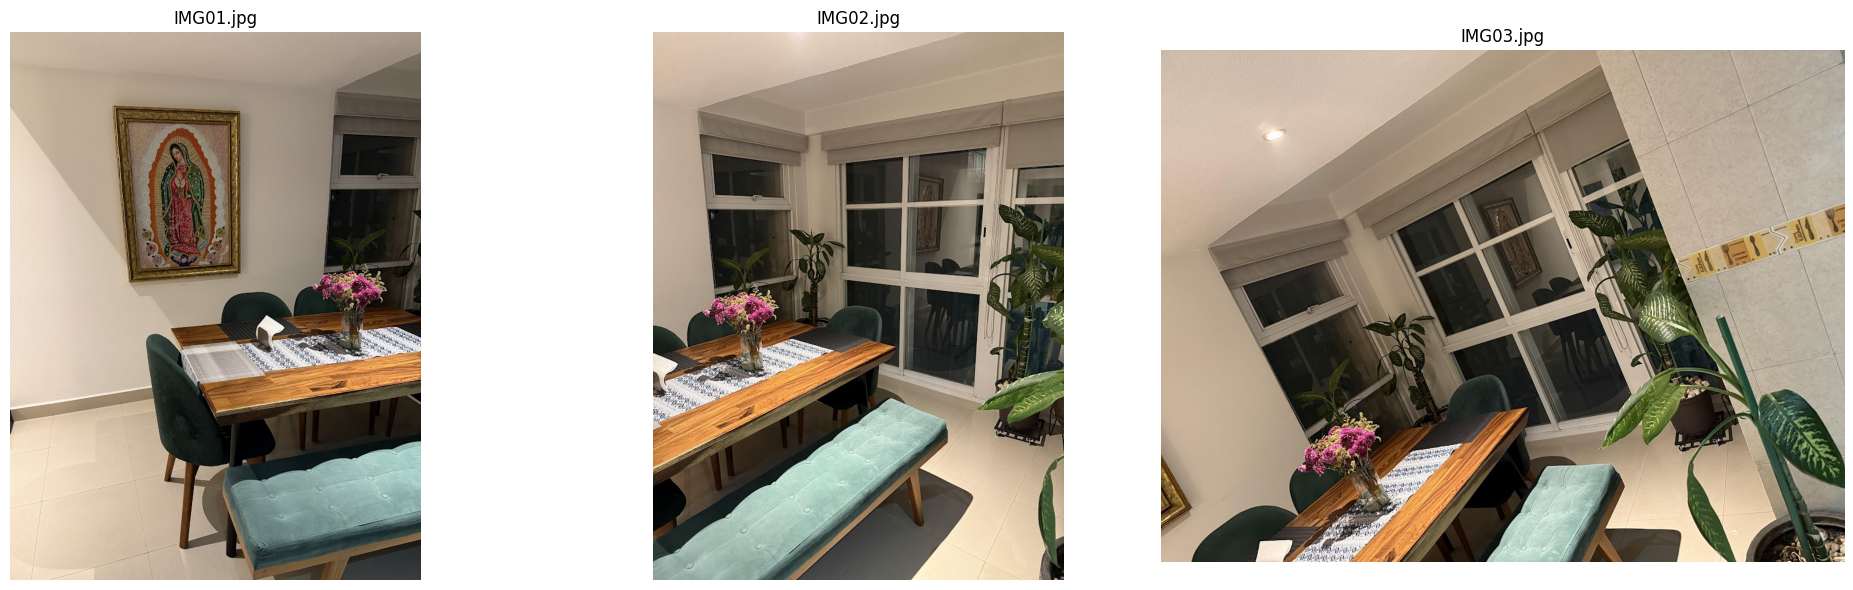

In [4]:
# Mostrar las imágenes cargadas
if len(imagenes_cargadas) > 0:
    fig, axes = plt.subplots(1, len(imagenes_cargadas), figsize=(20, 6))
    if len(imagenes_cargadas) == 1: axes = [axes] # Fix por si solo hay 1 imagen
    
    for ax, (nombre, img) in zip(axes, imagenes_cargadas.items()):
        # Convertir BGR a RGB para mostrar correctamente en matplotlib
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img_rgb)
        ax.set_title(f"{nombre}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("❌ No hay imágenes para mostrar.")

🔬 Ejecutando prueba de detectores en: IMG01.jpg...



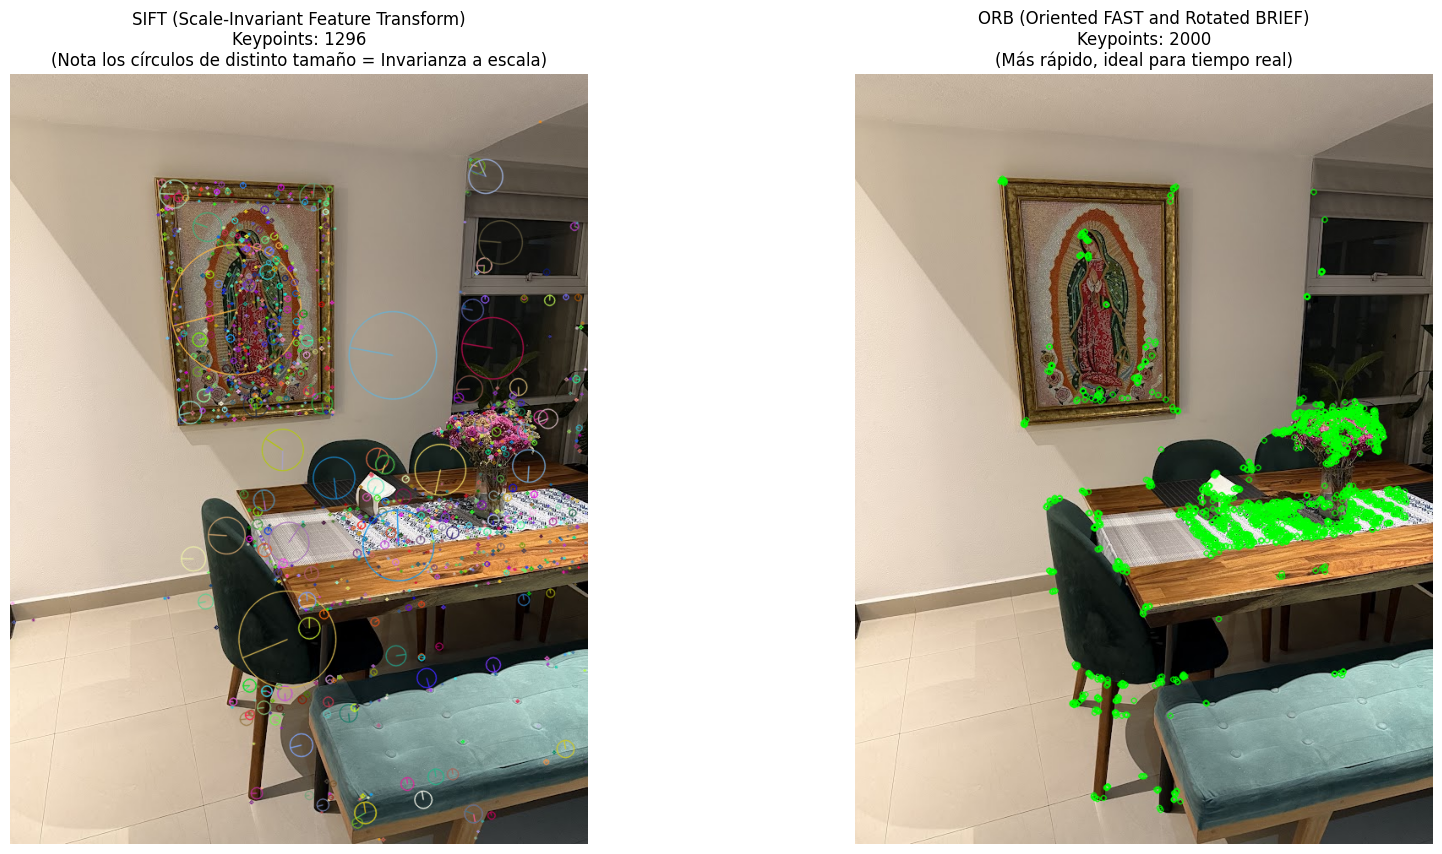

In [5]:
# Seleccionar la primera imagen para la prueba
if len(files) > 0:
    nombre_prueba = files[0] # Puedes cambiar el índice [0] por [1] o [2] para ver otras
    img_prueba = imagenes_cargadas[nombre_prueba]
    
    print(f"🔬 Ejecutando prueba de detectores en: {nombre_prueba}...\n")
    
    # --- 1. Método SIFT ---
    # SIFT detecta ubicación, escala y orientación
    kp_sift, _ = feature_detection.detect_features(img_prueba, method='SIFT')
    
    # Dibujamos con flags=4 para ver el tamaño y orientación (círculos con líneas)
    img_sift_vis = cv2.drawKeypoints(img_prueba, kp_sift, None, 
                                     flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    # --- 2. Método ORB ---
    # ORB es binario y rápido, solo detecta ubicación (generalmente)
    kp_orb, _ = feature_detection.detect_features(img_prueba, method='ORB')
    
    # Dibujamos puntos simples (color verde)
    img_orb_vis = cv2.drawKeypoints(img_prueba, kp_orb, None, color=(0,255,0), flags=0)

    # --- Comparación Visual ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    
    # Plot SIFT
    ax1.imshow(cv2.cvtColor(img_sift_vis, cv2.COLOR_BGR2RGB))
    ax1.set_title(f"SIFT (Scale-Invariant Feature Transform)\nKeypoints: {len(kp_sift)}\n(Nota los círculos de distinto tamaño = Invarianza a escala)")
    ax1.axis('off')
    
    # Plot ORB
    ax2.imshow(cv2.cvtColor(img_orb_vis, cv2.COLOR_BGR2RGB))
    ax2.set_title(f"ORB (Oriented FAST and Rotated BRIEF)\nKeypoints: {len(kp_orb)}\n(Más rápido, ideal para tiempo real)")
    ax2.axis('off')
    
    plt.show()

else:
    print("No hay imágenes disponibles para la prueba.")